Exercise H9: RBF
Group Name: BPJ

Members:
1. Poulami Ghosh
2. Bramantyo Ibrahim Supriyatno
3. Julie Morgan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [2]:
np.random.seed(2)

In [3]:
training = pd.read_csv('dataset/TrainingRidge.csv')
validation = pd.read_csv('dataset/ValidationRidge.csv')
training.head()

,x1,x2,obs
0,140,116,10
1,198,88,14
2,174,112,2
3,168,52,32
4,206,44,10


# Exercise H10.2A

In [4]:
svr_1 = svm.NuSVR()

In [5]:
svr_1.fit(training[['x1','x2']].to_numpy(), training[['obs']].to_numpy().ravel())
res = svr_1.predict(validation[['x1','x2']].to_numpy()).reshape((-1,1))

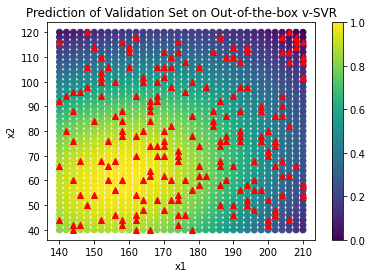

In [6]:
plt.title('Prediction of Validation Set on Out-of-the-box v-SVR')

plt.scatter(
    x=validation[['x1']],
    y=validation[['x2']],
    c=res)
plt.scatter( 
    x=training[['x1']],
    y=training[['x2']],
    color='red',
    marker='^'
)

plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

plt.show()

In [7]:
err = (validation[['dens']].to_numpy() - res)**2 /  res.shape[0]

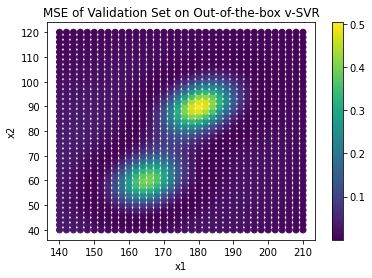

In [8]:
plt.title('MSE of Validation Set on Out-of-the-box v-SVR')

plt.scatter(
    x=validation[['x1']],
    y=validation[['x2']],
    c=err)

plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

plt.show()

# Exercise H10.2B

In [9]:
c = 2.**np.arange(-2,12,step=1)
gamma = 2.**np.arange(-12,0,step=1)
param_grid = {
    'C' : c,
    'gamma' : gamma
}

svr_2 = svm.NuSVR()
svr_cv_grid = GridSearchCV(svr_2, param_grid, cv=10,return_train_score=True)
svr_cv_grid.fit(training[['x1','x2']].to_numpy(), training[['obs']].to_numpy().ravel())

GridSearchCV(cv=10, estimator=NuSVR(),
             param_grid={'C': array([2.500e-01, 5.000e-01, 1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00,
       1.600e+01, 3.200e+01, 6.400e+01, 1.280e+02, 2.560e+02, 5.120e+02,
       1.024e+03, 2.048e+03]),
                         'gamma': array([2.44140625e-04, 4.88281250e-04, 9.76562500e-04, 1.95312500e-03,
       3.90625000e-03, 7.81250000e-03, 1.56250000e-02, 3.12500000e-02,
       6.25000000e-02, 1.25000000e-01, 2.50000000e-01, 5.00000000e-01])},
             return_train_score=True)

In [10]:
G,C = np.meshgrid(gamma, c)
mean_scores = svr_cv_grid.cv_results_['mean_test_score'].reshape(C.shape)

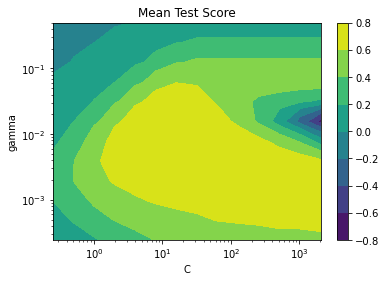

In [11]:
plt.contourf(C, G, mean_scores)
plt.title('Mean Test Score')
plt.xscale('log')
plt.xlabel('C')
plt.yscale('log')
plt.ylabel('gamma')
plt.colorbar()
plt.show()

In [12]:
mean_scores = svr_cv_grid.cv_results_['mean_train_score'].reshape(C.shape)

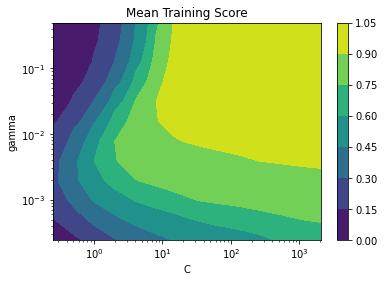

In [13]:
plt.contourf(C, G, mean_scores)
plt.title('Mean Training Score')
plt.xscale('log')
plt.xlabel('C')
plt.yscale('log')
plt.ylabel('gamma')
plt.colorbar()
plt.show()

# Exercise H10.2C

In [14]:
best_params = svr_cv_grid.best_params_

In [15]:
svr_best_params = svm.NuSVR(C=best_params['C'], gamma=best_params['gamma'])
svr_best_params.fit(training[['x1','x2']].to_numpy(), training[['obs']].to_numpy().ravel())

NuSVR(C=16.0, gamma=0.00390625)

In [16]:
res_best_params = svr_best_params.predict(validation[['x1','x2']].to_numpy()).reshape((-1,1))

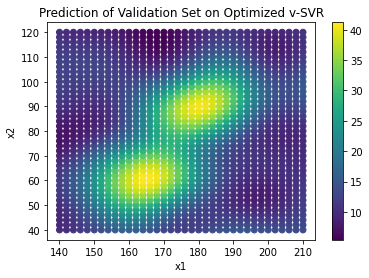

In [17]:
plt.title('Prediction of Validation Set on Optimized v-SVR')

plt.scatter(
    x=validation[['x1']],
    y=validation[['x2']],
    c=res_best_params)

plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

plt.show()

In [18]:
err_best_params = (validation[['dens']].to_numpy() - res_best_params)**2 /  res_best_params.shape[0]

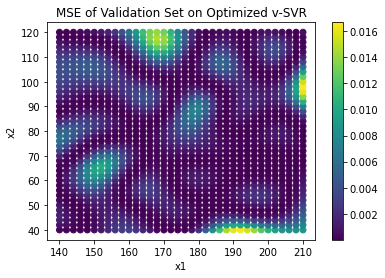

In [19]:
plt.title('MSE of Validation Set on Optimized v-SVR')

plt.scatter(
    x=validation[['x1']],
    y=validation[['x2']],
    c=err_best_params)

plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

plt.show()

Discussion

In general optimized v-SVR has significantly lower MSE compared to out-of-the-box v-SVR. The distribution of the error also seems to be more distributed.  